In [13]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from glob import glob
import warnings;warnings.filterwarnings(action="ignore")
import missingno
#warnings.simplefilter(action="ignore", category='all')
import time

In [14]:
#need this to print full rows and columns
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [16]:
df = pd.read_csv("new_model_data.csv")

In [17]:
#check dataset description
df.describe(include = 'all')

,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,LOCATION
count,7.088900e+04,70889,70889.000000,70889.000000,70889.000000,70889,70889
unique,NaN,2623,NaN,NaN,NaN,4,46
top,NaN,2019-12-25,NaN,NaN,NaN,FLAT,Lekki
freq,NaN,1896,NaN,NaN,NaN,52082,16212
mean,2.323874e+06,NaN,2.614298,2.668707,3.126917,NaN,NaN
std,2.977676e+06,NaN,1.185116,1.241712,1.433735,NaN,NaN
min,1.000000e+05,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,6.000000e+05,NaN,2.000000,2.000000,2.000000,NaN,NaN
50%,1.200000e+06,NaN,3.000000,3.000000,3.000000,NaN,NaN
75%,3.000000e+06,NaN,3.000000,3.000000,4.000000,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70889 entries, 0 to 70888
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PRICE       70889 non-null  float64
 1   DATE ADDED  70889 non-null  object 
 2   BEDROOMS    70889 non-null  int64  
 3   BATHROOMS   70889 non-null  int64  
 4   TOILETS     70889 non-null  int64  
 5   HOUSE_TYPE  70889 non-null  object 
 6   LOCATION    70889 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.8+ MB


In [19]:
df.shape

(70889, 7)

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(69186, 7)

In [22]:
df.sample()

,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,LOCATION
13753,3500000.0,2020-05-29,4,4,4,DUPLEX,Lekki


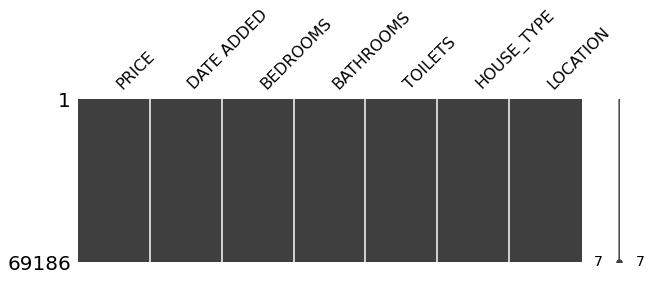

In [23]:
#check for missing values
missingno.matrix(df,figsize = (10,3));

In [24]:
#check for duplicates
df.duplicated().sum()

0

In [25]:
df.nunique()

PRICE          329
DATE ADDED    2623
BEDROOMS         9
BATHROOMS        9
TOILETS          9
HOUSE_TYPE       4
LOCATION        46
dtype: int64

In [27]:
#this function checks for the most frequent values and gives information about them since we can't afford to have too much a feature with too much values
def get_full_report(x):
    cnt = ( x.value_counts(ascending=False,dropna=False).head(1).index.values[0],
               100 * x.value_counts(ascending=False,dropna=False).head(1).values[0]/df.shape[0],
               x.value_counts(ascending=False,dropna=False).head(1).values[0])
    return cnt

In [28]:
#this is a report of the data
un_df= df.apply(lambda x: get_full_report(x)).rename(index={0:'Values',1:'Percentage',2:'Count'}).T.sort_values(by = 'Count',ascending = False)
un_df

,Values,Percentage,Count
HOUSE_TYPE,FLAT,73.383343,50771
BEDROOMS,3.0,34.10372,23595.0
BATHROOMS,3.0,30.244558,20925.0
TOILETS,3.0,26.071749,18038.0
LOCATION,Lekki,22.323881,15445
PRICE,1000000.0,4.681583,3239.0
DATE ADDED,2022-08-10,2.642153,1828


In [29]:
df_copy = df.copy()

In [30]:
#a function that plots count for location
def plot_count(df,col):
    sns.set()
    location_fr = df[col].value_counts()
    ord_frq = location_fr.index
    fig,ax = plt.subplots(figsize =(10,25))
    sns.countplot(y = col,data = df,order=ord_frq)
    plt.xlabel(str(col))
    plt.ylabel('COUNT')
    plt.show()

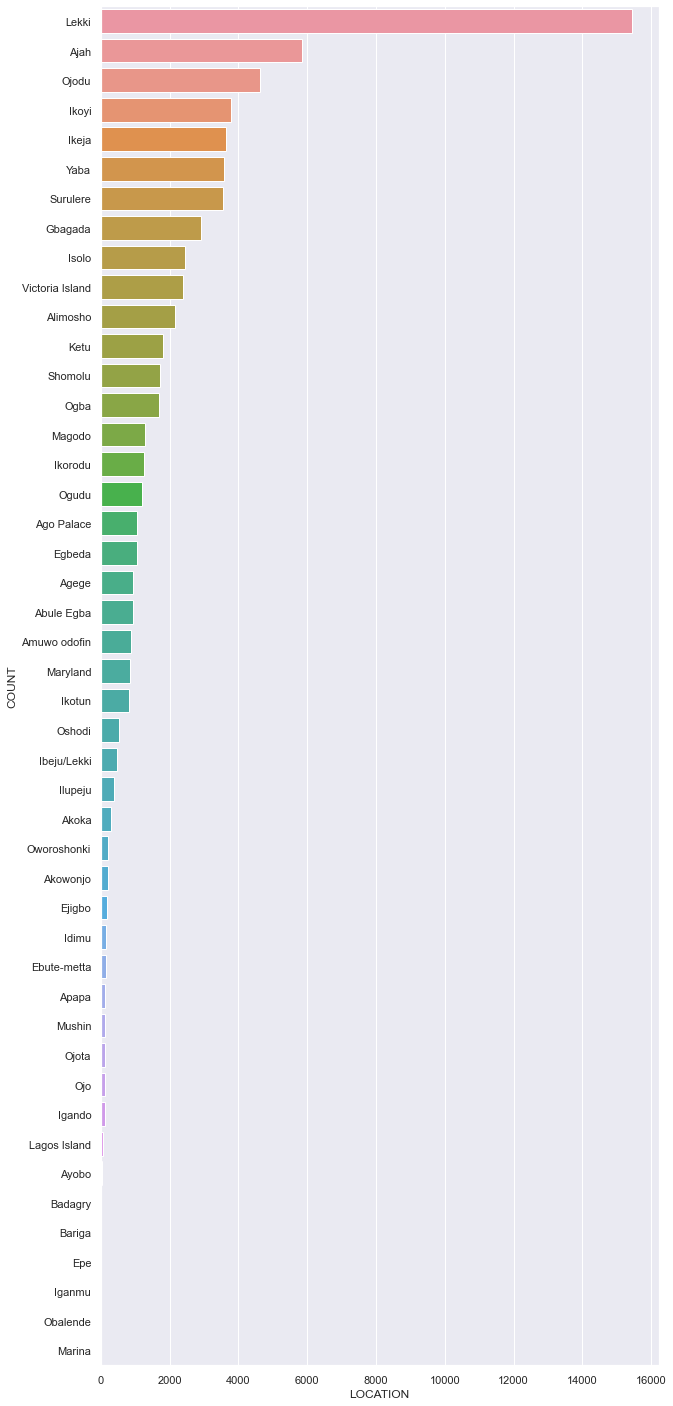

In [31]:
plot_count(df,'LOCATION') #before fixing the location column

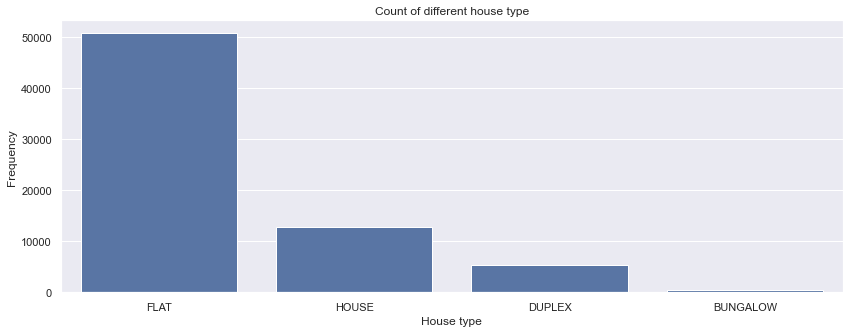

In [33]:
sns.set()
fig,ax = plt.subplots(figsize = (14,5))
location_fr = df['HOUSE_TYPE'].value_counts()
ord_frq = location_fr.index
sns.countplot(x = 'HOUSE_TYPE',data=df,color = sns.color_palette()[0],order = ord_frq)
#plt.ylim([0,50000])
plt.xlabel('House type')
plt.ylabel('Frequency')
plt.title('Count of different house type');

In [34]:
df['HOUSE_TYPE'].value_counts()

FLAT        50771
HOUSE       12730
DUPLEX       5262
BUNGALOW      423
Name: HOUSE_TYPE, dtype: int64

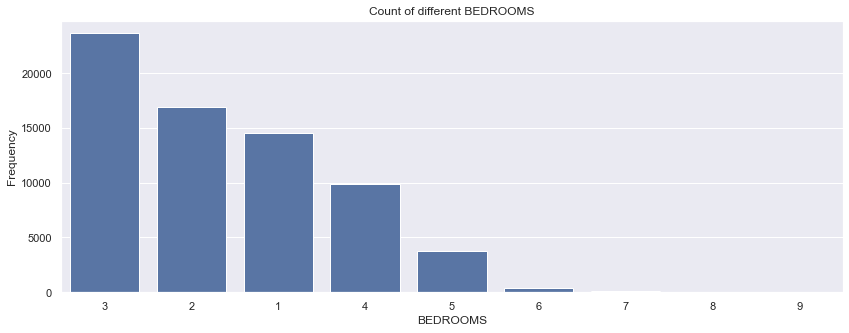

In [35]:
sns.set()
fig,ax = plt.subplots(figsize = (14,5))
location_fr = df['BEDROOMS'].value_counts()
ord_frq = location_fr.index
sns.countplot(x = 'BEDROOMS',data=df,color = sns.color_palette()[0],order = ord_frq)
#plt.ylim([0,50000])
plt.xlabel('BEDROOMS')
plt.ylabel('Frequency')
plt.title('Count of different BEDROOMS');

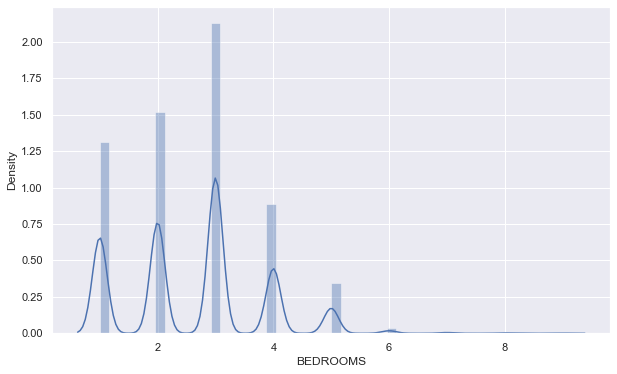

In [36]:
fig,ax = plt.subplots(figsize = (10,6))
sns.distplot(df['BEDROOMS']);

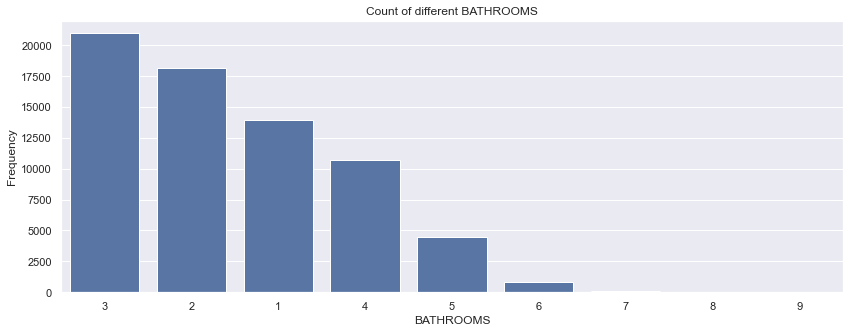

In [37]:
sns.set()
fig,ax = plt.subplots(figsize = (14,5))
location_fr = df['BATHROOMS'].value_counts()
ord_frq = location_fr.index
sns.countplot(x = 'BATHROOMS',data=df,color = sns.color_palette()[0],order = ord_frq)
#plt.ylim([0,50000])
plt.xlabel('BATHROOMS')
plt.ylabel('Frequency')
plt.title('Count of different BATHROOMS');

In [38]:
df['PRICE'].describe()

count    6.918600e+04
mean     2.337431e+06
std      3.004619e+06
min      1.000000e+05
25%      6.000000e+05
50%      1.200000e+06
75%      3.000000e+06
max      2.000000e+07
Name: PRICE, dtype: float64

2.7783582788451455


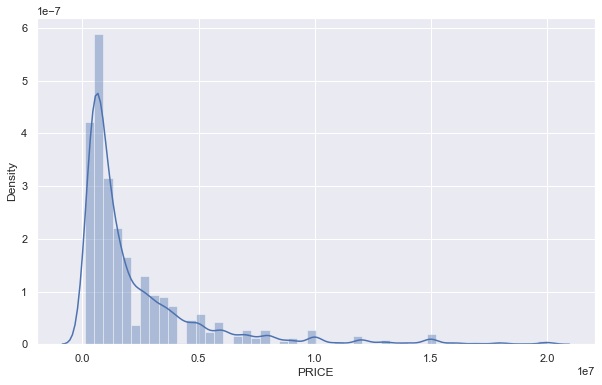

In [39]:
#as we can see price is very positively skewed
fig,ax = plt.subplots(figsize = (10,6))
sns.distplot(df['PRICE'])
print(df['PRICE'].skew()) #price is very positively skewed

2.7783582788451455


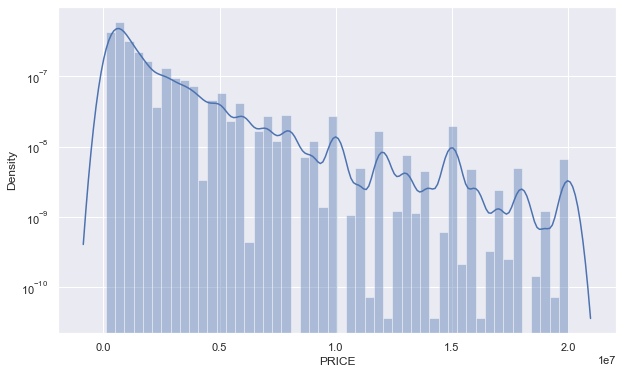

In [40]:
#as we can see price is very positively skewed after taking the logarithm of the price
fig,ax = plt.subplots(figsize = (10,6))
sns.distplot(df['PRICE'])
plt.yscale('log')
print(df['PRICE'].skew()) #price is very positively skewed

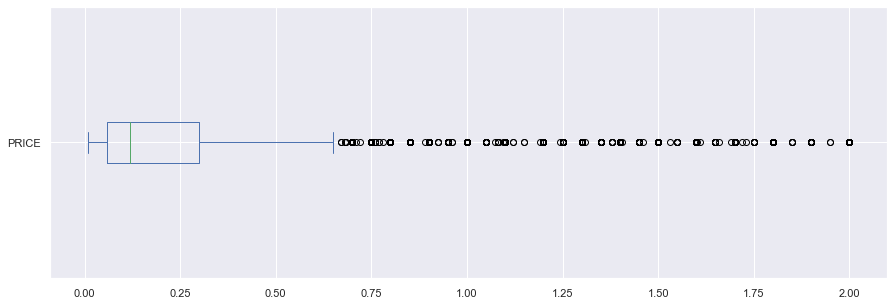

In [41]:
#check for outliers
fig,ax = plt.subplots(figsize = (15,5))
(df['PRICE'] / 1e7).plot(kind = 'box',vert = False); #there are no outliers there so we can do a time series analysis

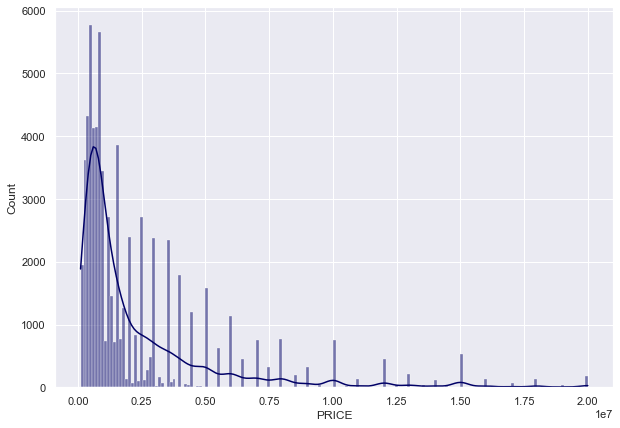

In [42]:
sns.set()
plt.figure(figsize=[10, 7])
sns.histplot(df_copy['PRICE'],kde = True,color="#000066")
plt.show()

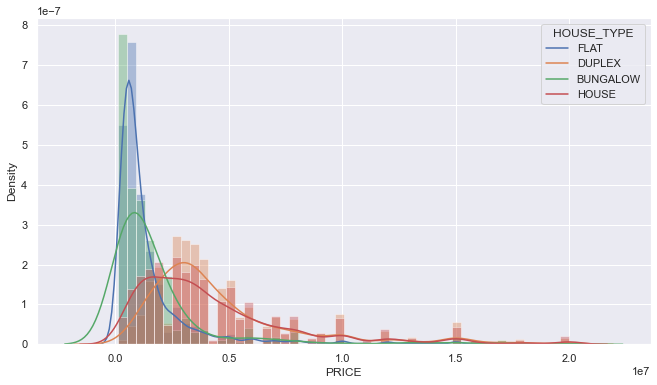

In [43]:
sns.set_style('darkgrid')
plt.subplots(figsize = (11,6))
sns.distplot(df_copy[df['HOUSE_TYPE'] == 'FLAT']['PRICE'],kde_kws = {'label':'FLAT'})
sns.distplot(df_copy[df['HOUSE_TYPE'] == 'DUPLEX']['PRICE'],kde_kws = {'label':'DUPLEX'})
sns.distplot(df_copy[df['HOUSE_TYPE'] == 'BUNGALOW']['PRICE'],kde_kws = {'label':'BUNGALOW'})
sns.distplot(df_copy[df['HOUSE_TYPE'] == 'HOUSE']['PRICE'],kde_kws = {'label':'HOUSE'})
# sns.distplot(df_copy[df['HOUSE_TYPE'] == 'DUPLEX WT BQ']['PRICE'],kde_kws = {'label':'DUPLEX WT BQ'})
plt.legend(title = 'HOUSE_TYPE')
plt.show()

In [44]:
def plot_frq(df,col):
    fig,ax =plt.subplots(figsize = (11,6))
    sns.regplot(data = df,x = col,y = 'PRICE')
    plt.xlabel(str(col))
    plt.ylabel('PRICE')
    plt.show()

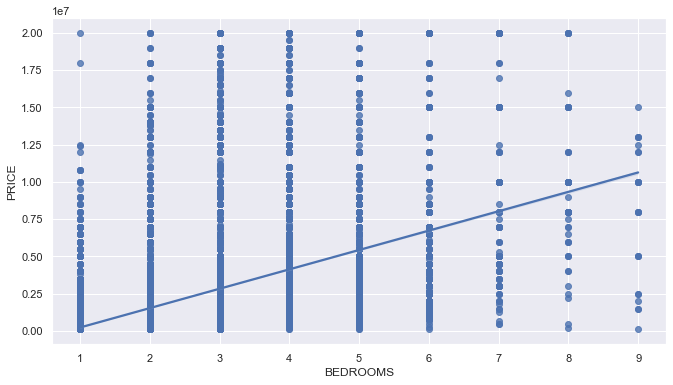

In [45]:
plot_frq(df_copy,'BEDROOMS')

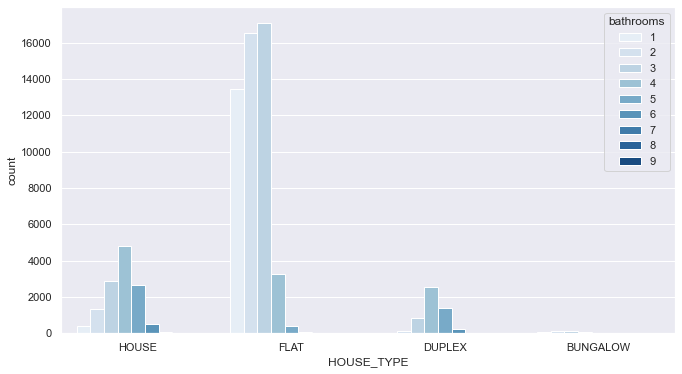

In [47]:
sns.set_style('darkgrid')
plt.figure(figsize = (11,6))
sns.countplot(data=df_copy,x = 'HOUSE_TYPE',hue = 'BATHROOMS',palette = 'Blues')
plt.legend(loc = 'upper right',title = 'bathrooms')
plt.show()

<Figure size 1440x720 with 0 Axes>

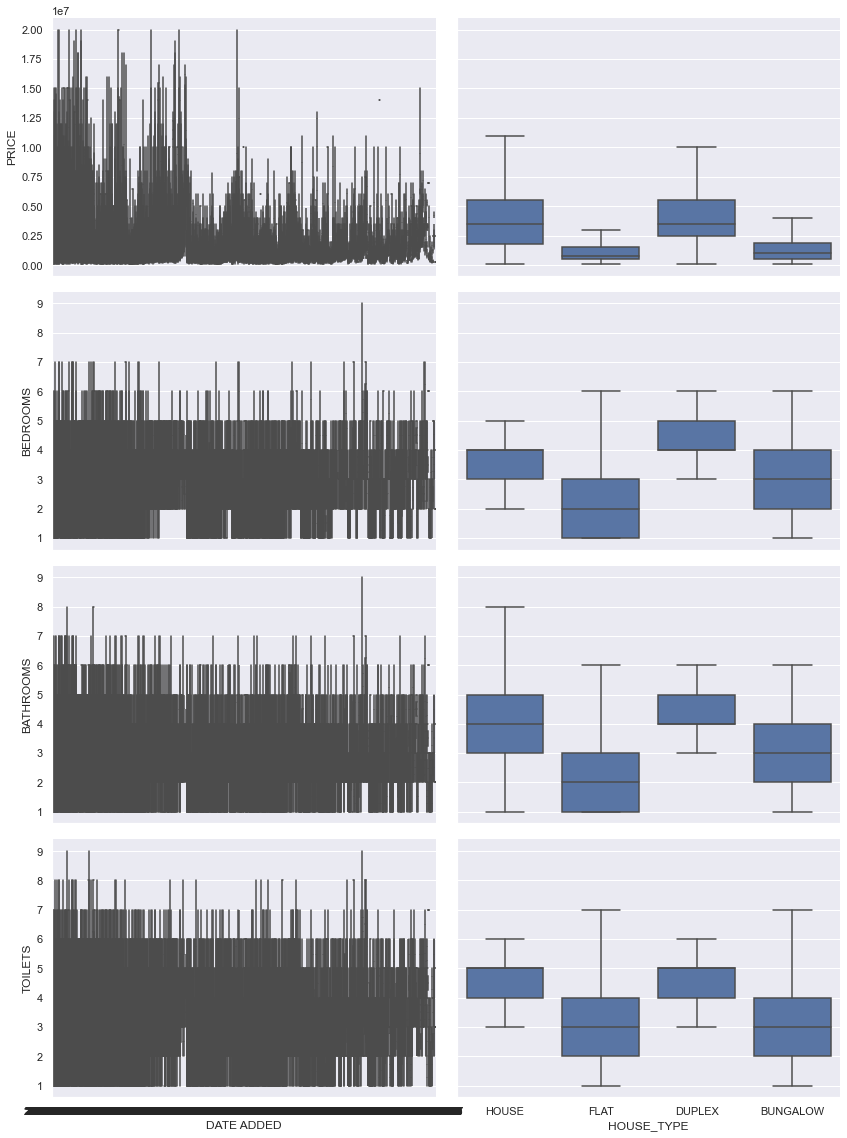

In [48]:
num_v = [col for col in df_copy.select_dtypes('number')]
cate_v = [col for col in df_copy.select_dtypes('O')if not col == 'LOCATION']
plt.figure(figsize = (20,10))
g  = sns.PairGrid(data=df_copy,x_vars=cate_v,y_vars=num_v,aspect = 1.5,size = 4)
g.map(sns.boxplot,color = sns.color_palette()[0],showfliers = False)
plt.show()

In [51]:
#checking the mean of location and house type to price
g_df = df_copy.groupby(['LOCATION','HOUSE_TYPE','BEDROOMS'])['PRICE'].mean().reset_index()
print_full(df_copy.groupby(['LOCATION','HOUSE_TYPE','BEDROOMS'])['PRICE'].max().reset_index())

            LOCATION HOUSE_TYPE  BEDROOMS                PRICE
0         Abule Egba   BUNGALOW         1           200,000.00
1         Abule Egba   BUNGALOW         2           400,000.00
2         Abule Egba   BUNGALOW         3         2,200,000.00
3         Abule Egba   BUNGALOW         4           850,000.00
4         Abule Egba     DUPLEX         3           700,000.00
5         Abule Egba     DUPLEX         4         3,000,000.00
6         Abule Egba     DUPLEX         5         2,000,000.00
7         Abule Egba     DUPLEX         6         1,200,000.00
8         Abule Egba     DUPLEX         9         2,500,000.00
9         Abule Egba       FLAT         1         1,200,000.00
10        Abule Egba       FLAT         2         1,800,000.00
11        Abule Egba       FLAT         3         4,500,000.00
12        Abule Egba       FLAT         4         3,500,000.00
13        Abule Egba       FLAT         5         1,200,000.00
14        Abule Egba       FLAT         7         4,000

<AxesSubplot:>

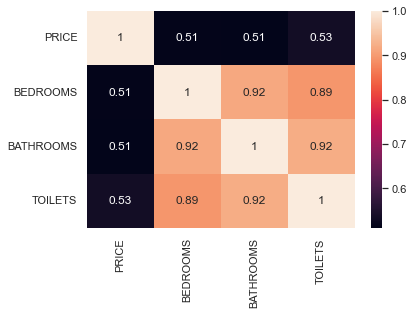

In [52]:
# check for correlations between the features
sns.heatmap(df_copy.corr(), annot = True)

<Figure size 576x432 with 0 Axes>

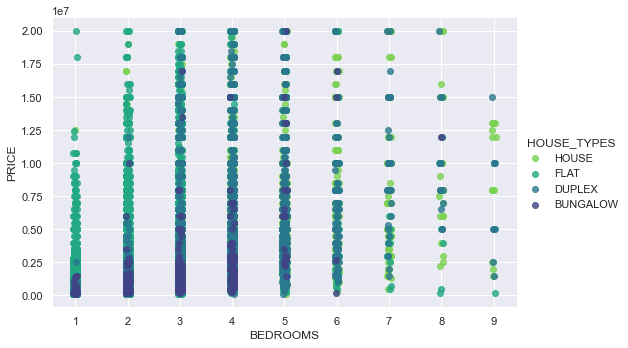

In [53]:
plt.figure(figsize = (8,6))
g = sns.FacetGrid(data=df_copy,hue = 'HOUSE_TYPE',size = 5,aspect = 1.5,palette='viridis_r')
g.map(sns.regplot,'BEDROOMS','PRICE',x_jitter = 0.04,fit_reg = False)
g.add_legend(title = 'HOUSE_TYPES')
plt.show()

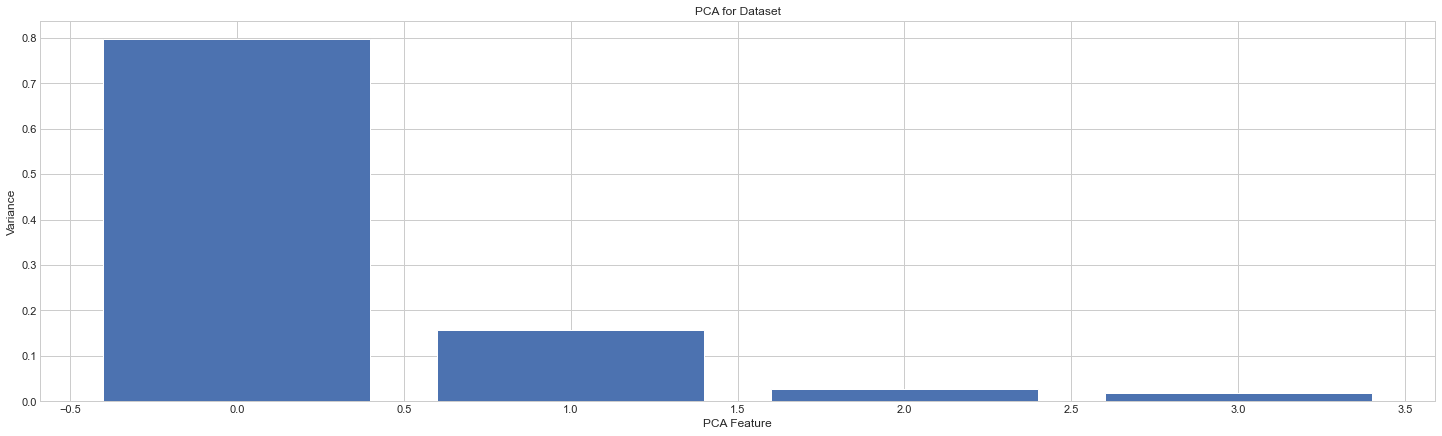

In [54]:
#calculate pca for the dataset
scale = StandardScaler().fit(df_copy[[col for col in df_copy.select_dtypes('number')]])
X = scale.transform(df_copy[[col for col in df_copy.select_dtypes('number')]])
pca1 = PCA(n_components = 4)
fit1 = pca1.fit(X)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (25,7))
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);